In [2]:
import pandas as pd 

data = pd.read_csv('C:\\Users\\lclai\\Desktop\\data_dementia\\clean\\dementia_related_comordibities.csv')
data

,AGE,GENDER,DEMENTIA,ETHNICITY,MARITAL_STATUS,HYPERTENSION,CARDIOVASCULAR_DISEASE,SLEEP_DISORDERS,DEPRESSION,HYPERLIPIDEMIA,STROKE,DIABETES,UTI,RESPIRATORY_FAILURE,ANEMIA,PNEUMONIA,KIDNEY_DISEASE
0,72,M,1,WHITE,MARRIED,1,1,0,0,0,0,0,0,0,0,1,0
1,87,F,1,WHITE,OTHER,0,0,0,1,0,0,1,1,0,0,0,0
2,88,M,1,WHITE,OTHER,0,1,0,0,0,0,0,0,0,0,0,0
3,73,M,1,WHITE,UNMARRIED,1,1,0,1,0,1,0,0,0,0,0,0
4,70,M,1,WHITE,UNMARRIED,1,1,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48144,72,M,0,WHITE,MARRIED,0,1,0,0,0,0,0,0,0,0,0,1
48145,82,M,0,WHITE,MARRIED,1,1,0,0,0,0,0,0,0,0,0,0
48146,68,F,0,OTHER,OTHER,0,1,0,0,0,0,0,0,0,1,0,0
48147,69,F,0,WHITE,OTHER,0,1,0,0,0,0,0,0,0,0,1,1


In [ ]:
import pandas as pd
import numpy as np

Q1 = data['AGE'].quantile(0.25)
Q3 = data['AGE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_filtered = data[(data['AGE'] >= lower_bound) & (data['AGE'] <= upper_bound)]

df_alzheimer = data_filtered[data_filtered['DEMENTIA'] == 1]
df_no_alzheimer = data_filtered[data_filtered['DEMENTIA'] == 0]

df_no_alzheimer_sampled = pd.DataFrame()

binary_cols = [col for col in data.columns if data[col].nunique() == 2 and col not in ['DEMENTIA', 'GENDER', 'MARITAL_STATUS', 'ETHNICITY']]

for (age, gender), group in df_alzheimer.groupby(['AGE', 'GENDER']):

    matched_controls = df_no_alzheimer[(df_no_alzheimer['AGE'] == age) & (df_no_alzheimer['GENDER'] == gender)]
    
    if len(matched_controls) > len(group):

        matched_controls['difference'] = matched_controls[binary_cols].apply(lambda row: np.abs(row - group[binary_cols].mean()).sum(), axis=1)
        
        matched_controls = matched_controls.nlargest(len(group), 'difference')
    
    df_no_alzheimer_sampled = pd.concat([df_no_alzheimer_sampled, matched_controls])

df_balanced = pd.concat([df_alzheimer, df_no_alzheimer_sampled])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Casos después de undersampling: {df_balanced['DEMENTIA'].sum()}")
print(f"Controles después de undersampling: {len(df_balanced) - df_balanced['DEMENTIA'].sum()}")


C:\Users\lclai\AppData\Local\Temp\ipykernel_27120\2159419919.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_controls['difference'] = matched_controls[binary_cols].apply(lambda row: np.abs(row - group[binary_cols].mean()).sum(), axis=1)
C:\Users\lclai\AppData\Local\Temp\ipykernel_27120\2159419919.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_controls['difference'] = matched_controls[binary_cols].apply(lambda row: np.abs(row - group[binary_cols].mean()).sum(), axis=1)
C:\Users\lcl

Casos después de undersampling: 3404
Controles después de undersampling: 3404


C:\Users\lclai\AppData\Local\Temp\ipykernel_27120\2159419919.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_controls['difference'] = matched_controls[binary_cols].apply(lambda row: np.abs(row - group[binary_cols].mean()).sum(), axis=1)


In [ ]:
import pandas as pd
import numpy as np



# Filtrado de outliers de edad
Q1 = data['AGE'].quantile(0.25)
Q3 = data['AGE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_filtered = data[(data['AGE'] >= lower_bound) & (data['AGE'] <= upper_bound)]

# Separar los casos y controles
df_alzheimer = data_filtered[data_filtered['DEMENTIA'] == 1]
df_no_alzheimer = data_filtered[data_filtered['DEMENTIA'] == 0]

df_no_alzheimer_sampled = pd.DataFrame()

# Emparejar por edad y sexo
for (age, gender), group in df_alzheimer.groupby(['AGE', 'GENDER']):
    matched_controls = df_no_alzheimer[(df_no_alzheimer['AGE'] == age) & (df_no_alzheimer['GENDER'] == gender)]
    
    # Si hay más controles que casos, tomar un número igual de controles
    if len(matched_controls) > len(group):
        matched_controls = matched_controls.sample(n=len(group), random_state=42)
    
    # Añadir los controles emparejados a la muestra
    df_no_alzheimer_sampled = pd.concat([df_no_alzheimer_sampled, matched_controls])

# Crear el conjunto de datos balanceado
df_balanced = pd.concat([df_alzheimer, df_no_alzheimer_sampled])

# Mezclar aleatoriamente el dataframe
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Imprimir los resultados
print(f"Casos después de undersampling: {df_balanced['DEMENTIA'].sum()}")
print(f"Controles después de undersampling: {len(df_balanced) - df_balanced['DEMENTIA'].sum()}")


Casos después de undersampling: 3404
Controles después de undersampling: 3404


In [42]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score

# Procesar las variables categóricas con LabelEncoder
label_encoder = LabelEncoder()

data['ETHNICITY'] = label_encoder.fit_transform(data['ETHNICITY'])
data['MARITAL_STATUS'] = label_encoder.fit_transform(data['MARITAL_STATUS'])
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])

# Filtrar outliers de edad
Q1 = data['AGE'].quantile(0.25)
Q3 = data['AGE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_filtered = data[(data['AGE'] >= lower_bound) & (data['AGE'] <= upper_bound)]

# Dividir en train y test (80% entrenamiento y 20% prueba)
train_data, test_data = train_test_split(data_filtered, test_size=0.2, random_state=42)

# Realizar undersampling solo en el conjunto de entrenamiento
df_alzheimer_train = train_data[train_data['DEMENTIA'] == 1]
df_no_alzheimer_train = train_data[train_data['DEMENTIA'] == 0]

df_no_alzheimer_sampled_train = pd.DataFrame()

# Columnas binarias para calcular la diferencia
binary_cols = [col for col in train_data.columns if train_data[col].nunique() == 2 and col not in ['DEMENTIA', 'GENDER', 'MARITAL_STATUS', 'ETHNICITY']]

for (age, gender), group in df_alzheimer_train.groupby(['AGE', 'GENDER']):
    matched_controls = df_no_alzheimer_train[(df_no_alzheimer_train['AGE'] == age) & (df_no_alzheimer_train['GENDER'] == gender)]
    
    if len(matched_controls) > len(group):
        matched_controls['difference'] = matched_controls[binary_cols].apply(lambda row: np.abs(row - group[binary_cols].mean()).sum(), axis=1)
        matched_controls = matched_controls.nlargest(len(group), 'difference')
    
    df_no_alzheimer_sampled_train = pd.concat([df_no_alzheimer_sampled_train, matched_controls])

# Concatenar el conjunto de datos balanceado de entrenamiento
df_balanced_train = pd.concat([df_alzheimer_train, df_no_alzheimer_sampled_train])
df_balanced_train = df_balanced_train.sample(frac=1, random_state=42).reset_index(drop=True)

# Test set sin balancear
df_test = test_data


# Escalar la edad
scaler = StandardScaler()

# Ajustar y transformar el conjunto de entrenamiento
df_balanced_train['AGE'] = scaler.fit_transform(df_balanced_train[['AGE']])

# Transformar el conjunto de prueba
df_test['AGE'] = scaler.transform(df_test[['AGE']])

# Separar características y variable objetivo en train y test
y_train = df_balanced_train['DEMENTIA']  
X_train = df_balanced_train.drop(columns=['DEMENTIA','difference']) 

y_test = df_test['DEMENTIA']
X_test = df_test.drop(columns=['DEMENTIA'])

# Configuración de RandomForest y GridSearch
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [100, 500],  
    'max_depth': [10, 20, 30, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt'],
}

rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

print("Best parameters found: ", rf_grid_search.best_params_)
print(f"Random Forest AUC: {rf_grid_search.best_score_}")

# Evaluar el modelo en el conjunto de prueba
y_proba = rf_grid_search.best_estimator_.predict_proba(X_test)[:, 1] 
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc}")


C:\Users\lclai\AppData\Local\Temp\ipykernel_27120\3517887526.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_controls['difference'] = matched_controls[binary_cols].apply(lambda row: np.abs(row - group[binary_cols].mean()).sum(), axis=1)
C:\Users\lclai\AppData\Local\Temp\ipykernel_27120\3517887526.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_controls['difference'] = matched_controls[binary_cols].apply(lambda row: np.abs(row - group[binary_cols].mean()).sum(), axis=1)
C:\Users\lcl

Best parameters found:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Random Forest AUC: 0.9696347088478559
AUC: 0.5314371161184575


C:\Users\lclai\AppData\Local\Temp\ipykernel_27120\2684016112.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_controls['difference'] = matched_controls[binary_cols].apply(lambda row: np.abs(row - group[binary_cols].mean()).sum(), axis=1)
C:\Users\lclai\AppData\Local\Temp\ipykernel_27120\2684016112.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_controls['difference'] = matched_controls[binary_cols].apply(lambda row: np.abs(row - group[binary_cols].mean()).sum(), axis=1)
C:\Users\lcl

KeyboardInterrupt: 

KeyError: "['difference'] not found in axis"

In [27]:
df_balanced

,AGE,GENDER,DEMENTIA,ETHNICITY,MARITAL_STATUS,HYPERTENSION,CARDIOVASCULAR_DISEASE,SLEEP_DISORDERS,DEPRESSION,HYPERLIPIDEMIA,STROKE,DIABETES,UTI,RESPIRATORY_FAILURE,ANEMIA,PNEUMONIA,KIDNEY_DISEASE
0,70,F,0,OTHER,MARRIED,0,1,0,0,0,0,0,0,0,0,0,1
1,61,F,1,OTHER,MARRIED,1,1,0,0,0,0,1,0,0,0,0,0
2,85,F,1,WHITE,OTHER,1,1,0,0,0,0,0,0,0,0,0,0
3,58,F,0,WHITE,MARRIED,1,1,0,0,1,0,0,0,0,0,0,0
4,48,F,0,WHITE,MARRIED,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,46,F,0,WHITE,UNMARRIED,0,1,0,0,0,0,0,0,1,0,0,1
6804,74,M,0,WHITE,MARRIED,1,1,0,0,1,0,1,0,0,0,0,0
6805,75,F,0,WHITE,OTHER,1,1,0,0,1,0,0,0,0,0,0,0
6806,76,M,0,WHITE,MARRIED,0,1,0,0,0,0,1,0,0,0,0,0


In [28]:
df_balanced.columns

Index(['AGE', 'GENDER', 'DEMENTIA', 'ETHNICITY', 'MARITAL_STATUS',
       'HYPERTENSION', 'CARDIOVASCULAR_DISEASE', 'SLEEP_DISORDERS',
       'DEPRESSION', 'HYPERLIPIDEMIA', 'STROKE', 'DIABETES', 'UTI',
       'RESPIRATORY_FAILURE', 'ANEMIA', 'PNEUMONIA', 'KIDNEY_DISEASE'],
      dtype='object')

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()

df_balanced['ETHNICITY'] = label_encoder.fit_transform(df_balanced['ETHNICITY'])
df_balanced['MARITAL_STATUS'] = label_encoder.fit_transform(df_balanced['MARITAL_STATUS'])
df_balanced['GENDER'] = label_encoder.fit_transform(df_balanced['GENDER'])

scaler = StandardScaler()
df_balanced['AGE'] = scaler.fit_transform(df_balanced[['AGE']])
df_balanced


,AGE,GENDER,DEMENTIA,ETHNICITY,MARITAL_STATUS,HYPERTENSION,CARDIOVASCULAR_DISEASE,SLEEP_DISORDERS,DEPRESSION,HYPERLIPIDEMIA,STROKE,DIABETES,UTI,RESPIRATORY_FAILURE,ANEMIA,PNEUMONIA,KIDNEY_DISEASE
0,0.096870,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,-0.464878,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0
2,1.033117,0,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0
3,-0.652127,0,0,2,0,1,1,0,0,1,0,0,0,0,0,0,0
4,-1.276292,0,0,2,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,-1.401125,0,0,2,2,0,1,0,0,0,0,0,0,1,0,0,1
6804,0.346536,1,0,2,0,1,1,0,0,1,0,1,0,0,0,0,0
6805,0.408953,0,0,2,1,1,1,0,0,1,0,0,0,0,0,0,0
6806,0.471369,1,0,2,0,0,1,0,0,0,0,1,0,0,0,0,0


In [31]:
from sklearn.model_selection import train_test_split

y = df_balanced['DEMENTIA']  
X = df_balanced.drop(columns=['DEMENTIA']) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,  StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [100, 500],  
    'max_depth': [10, 20, 30, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt'],
}

rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

print("Best parameters found: ", rf_grid_search.best_params_)
print(f"Random Forest AUC: {rf_grid_search.best_score_}")

Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Random Forest AUC: 0.7324656906787872


In [33]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

y_proba = rf_grid_search.best_estimator_.predict_proba(X_test)[:, 1] 
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc}")

AUC: 0.745509659192189


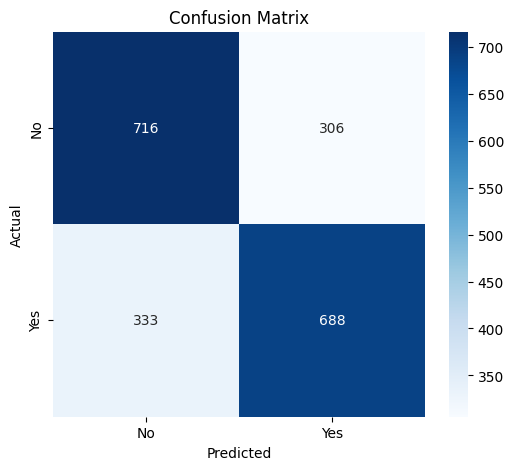

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1022
           1       0.69      0.67      0.68      1021

    accuracy                           0.69      2043
   macro avg       0.69      0.69      0.69      2043
weighted avg       0.69      0.69      0.69      2043

AUC: 0.745509659192189


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

y_pred = (y_proba >= 0.5).astype(int)  

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc}")

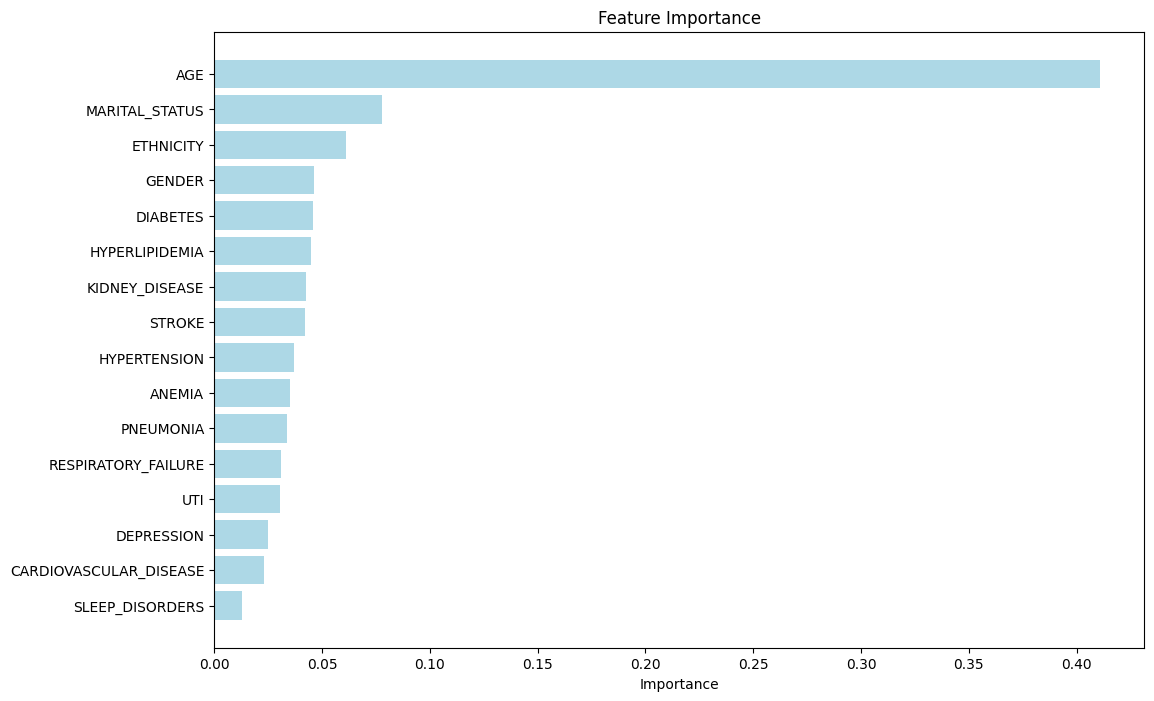

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = rf_grid_search.best_estimator_.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  
plt.show()